### Task 2: Trinary Classification

In [102]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Load data
df = pd.read_csv('./train.csv')
df.head(5)

,Id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,0,1,21.492417,22.475495,4.051168,6.023558,5.052601,5.664391,3.577206,5.077697,22.071242,16.960494,30.862626,32.055150,32.055150,23.938547,34.375529,35.554714
1,1,2,25.062431,8.295979,2.880201,4.018839,6.359460,5.756855,3.560095,5.417843,29.925779,14.161765,29.439056,33.111205,33.111205,22.455204,41.492100,34.248015
2,2,2,35.137688,19.840681,3.943055,5.158265,5.401766,4.077940,4.741661,6.279194,27.585017,19.707357,30.447598,16.599424,16.599424,23.421009,29.171514,34.234587
3,3,2,16.451959,14.196442,4.600019,5.231278,5.304275,6.075448,4.340841,4.554399,28.732052,13.334858,22.742325,36.880900,36.880900,31.438863,28.045910,20.487503
4,4,1,18.804761,34.898449,5.487226,6.319400,4.765494,5.747063,4.253686,4.805762,18.470005,23.170549,29.818608,32.998557,32.998557,31.033532,32.056417,33.721745


In [20]:
features = df.columns.values[2:df.shape[1]]

In [37]:
num_features = features.shape[0]

In [19]:
print(df.columns.values)

['Id' 'y' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x13' 'x14' 'x15' 'x16']


<function matplotlib.pyplot.show>

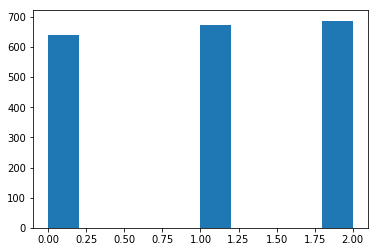

In [103]:
#format data for tensorflow
inputX = df.loc[:, features].as_matrix()
inputY = df.loc[:, 'y'].as_matrix()

plt.hist(inputY)
plt.show

In [40]:
#Set hyperparameters
rate = .01
epochs = 2000
display_step = 50
n = inputY.size

In [98]:
#Define computation graph (neural network)

#until x is fed through
x = tf.placeholder(tf.float32, [None, num_features]) #None allows for any num examples

#weights
W = tf.Variable(tf.zeros([num_features, 10]))

#add biases
b = tf.Variable(tf.zeros([10]))

#Wx
y_vals = tf.add(tf.matmul(x, W), b)

#Apply softmax
y = tf.nn.softmax(y_vals)
y_ = tf.placeholder(tf.float32, [None])

In [99]:
#Define cost and optimization
cost = tf.reduce_sum(tf.pow(y_ - y, 2))/(2*n)

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)

In [100]:
#Set up session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print(x.shape, inputX.shape, y_.shape, inputY.shape)

(?, 16) (2000, 16) (?,) (2000,)


In [101]:
#Train

for i in range(epochs):
    sess.run(optimizer, feed_dict={x: inputX, y_: inputY})
    
    #log
    if (i) % display_step == 0:
        cc = sess.run(cost, feed_dict={x: inputX, y_:inputY})
        print("Training step:", '%04d' % (i), "cost=", "{:.9f}".format(cc)) 
print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={x: inputX, y_: inputY})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

InvalidArgumentError: Incompatible shapes: [2000] vs. [2000,10]
	 [[Node: gradients_8/sub_11_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_8/sub_11_grad/Shape, gradients_8/sub_11_grad/Shape_1)]]

Caused by op 'gradients_8/sub_11_grad/BroadcastGradientArgs', defined at:
  File "c:\python\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\python\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\python\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\python\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\python\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\python\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\python\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\python\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\python\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\python\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\python\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\python\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\python\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\python\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\python\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-99-45c7d5792b80>", line 4, in <module>
    optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\training\optimizer.py", line 359, in minimize
    grad_loss=grad_loss)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\training\optimizer.py", line 460, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 611, in gradients
    lambda: grad_fn(op, *out_grads))
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 377, in _MaybeCompile
    return grad_fn()  # Exit early
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 611, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py", line 774, in _SubGrad
    rx, ry = gen_array_ops._broadcast_gradient_args(sx, sy)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 599, in _broadcast_gradient_args
    "BroadcastGradientArgs", s0=s0, s1=s1, name=name)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3271, in create_op
    op_def=op_def)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'sub_11', defined at:
  File "c:\python\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 17 identical lines from previous traceback]
  File "c:\python\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-99-45c7d5792b80>", line 2, in <module>
    cost = tf.reduce_sum(tf.pow(y_ - y, 2))/(2*n)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_ops.py", line 934, in binary_op_wrapper
    return func(x, y, name=name)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 5387, in _sub
    "Sub", x=x, y=y, name=name)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3271, in create_op
    op_def=op_def)
  File "c:\python\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [2000] vs. [2000,10]
	 [[Node: gradients_8/sub_11_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_8/sub_11_grad/Shape, gradients_8/sub_11_grad/Shape_1)]]
